In [1]:
# Set paths (Currently, need to run this cell every ipynb file...)
# You can add these paths to PYTHONPATH in .zshrc/.zprofile (.bashrc/.bash_profile)
# PYTHONPATH='/Users/masunaga/work/python_git/lib_open/projects/Hisaki_py:$PYTHONPATH'
# export PYTHONPATH

import sys
# Revise the path as nessesary for your environment
hskpypath = '/Users/tsuch/VSCode/python/Hisaki/Hisaki_Py/'
if hskpypath not in sys.path:
    sys.path.append(hskpypath)

# Revise the path as nessesary for your environment
mypypath = '/Users/tsuch/VSCode/python/Hisaki/'
if mypypath not in sys.path:
    sys.path.append(mypypath)


In [2]:
import hskinit  ## Run hskinit
import hskpy.general.data as hsk

# (1) Download data

In [3]:
import datetime as dt

# start date
start_date = (2014,2,18)
# number of day from the start date
n_day = 11
# Target
target = 'jupiter'   # Observation target name
# Target wavelength (nm)
target_wavelength = 121.6


# download data
proc_date = dt.date(start_date[0], start_date[1], start_date[2])
file_list = []
for i in range(n_day):
    date_str = proc_date.strftime('%Y%m%d')
    # print(date_str)

    sky_flag = False     # Set True for sky observation data (5 arcmin offset from the target)
    hsk.download_data_l2p(target, date_str, dt='00010', sky=sky_flag)
    fname = hsk.get_fname(target, date_str, lv='l2p', vr='01_00', dt='00010', sky=sky_flag, fullpath=True)
    file_list.append(fname)

    sky_flag = True     # Set True for sky observation data (5 arcmin offset from the target)
    hsk.download_data_l2p(target, date_str, dt='00010', sky=sky_flag)
    fname = hsk.get_fname(target, date_str, lv='l2p', vr='01_00', dt='00010', sky=sky_flag, fullpath=True)
    file_list.append(fname)

    proc_date += dt.timedelta(days=1)



File exeuv_jupiter_20140218_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_sky_20140218_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_jupiter_20140219_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_sky_20140219_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_jupiter_20140220_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_sky_20140220_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_jupiter_20140221_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_sky_20140221_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_jupiter_20140222_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_sky_20140222_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local computer.
File exeuv_jupiter_20140223_lv02p_LT00-24_dt00010_vr01_00.fits exists in the local compute

# (2-1) Process data

In [4]:
import numpy as np
import matplotlib.pyplot as plt  # import pyplot module
import matplotlib.patches as patches

# initialize variables
timeDt = []         # observation date/time
sclt = []           # local time of Hisaki
int_time = []       # integration time [miniuts]
cnt_roi = []        # total count of photons in ROI
err_roi = []        # error of the total count

# set ROI (region of interest)
target_wavelength_A = target_wavelength*10.0
wl_width = 16.0         # [A]
x_roi=[target_wavelength_A+wl_width, target_wavelength_A-wl_width]  # wavelength [A]
y_roi=[-220.0, 200.0]   # space along a slit [arcsec]

# read data
for fname in file_list:
    # open fits file
    hdul = hsk.fitsopen(fname)

    # get number of images
    n_ext = hsk.get_nextend(hdul)

    # get axis
    x_axis = hsk.get_xaxis(hdul, ext=1)
    y_axis = hsk.get_yaxis(hdul, ext=1)

    for i in range(2, n_ext+1):
        # get attributes
        timeDt.append(hsk.get_timeDt(hdul, ext=i))
        sclt.append(hsk.get_sclt(hdul, ext=i))   # Local time of Hisaki
        int_time_ = float(hsk.get_inttime(hdul, ext=i))
        int_time.append(int_time_)

        # get total count in the ROI
        img = hsk.get_img(hdul, ext=i) * int_time_     # counts/min -> counts
        cnt_roi_ = hsk.get_total_count(img, x_axis, y_axis, x_roi, y_roi)
        cnt_roi.append(cnt_roi_ / int_time_)           # counts/min
        err_roi.append(np.sqrt(cnt_roi_) / int_time_)  # error of the count rate

    # close fits file
    hdul.close()


---- Opened exeuv_jupiter_20140218_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140218_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----


EXTENSION=                     / compiled at Apr 22 2015 09:35:11 (JST)          [astropy.io.fits.card]
EXTENSION=                     / compiled at Feb 12 2016 16:10:08 (JST)          [astropy.io.fits.card]


---- Opened exeuv_jupiter_20140219_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140219_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20140220_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140220_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20140221_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140221_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20140222_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened

# Check the ROI position

---- Opened exeuv_jupiter_20140218_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140218_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20140219_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140219_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20140220_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_sky_20140220_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened exeuv_jupiter_20140221_lv02p_LT00-24_dt00010_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----
---- Opened

/var/folders/k5/4k14l1hs0vx239m2nhghyhr00000gn/T/ipykernel_5877/1890627464.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


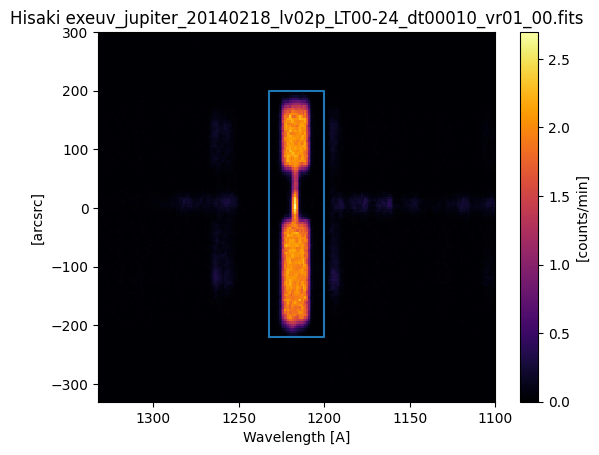

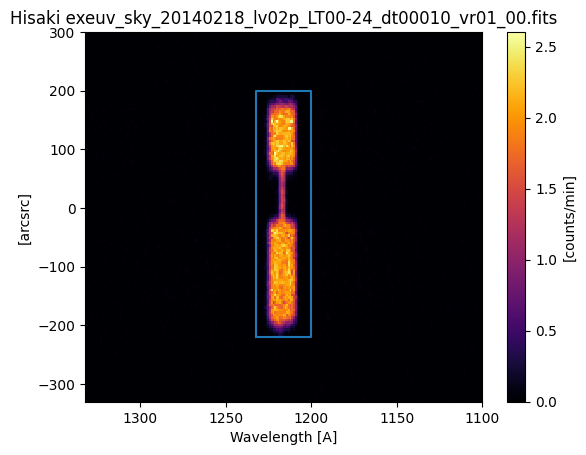

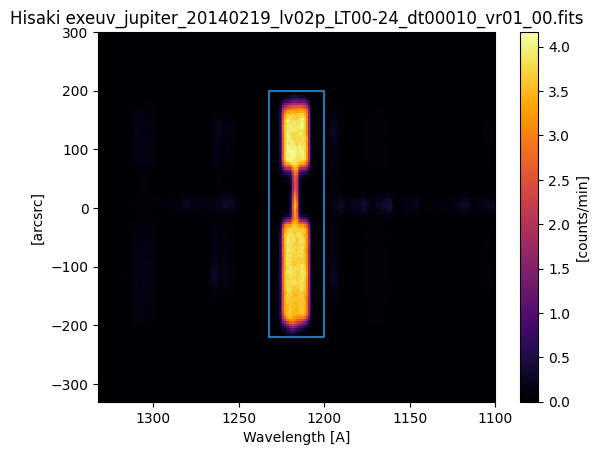

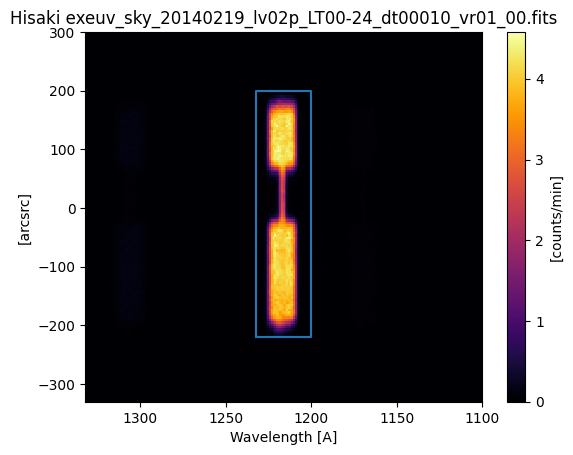

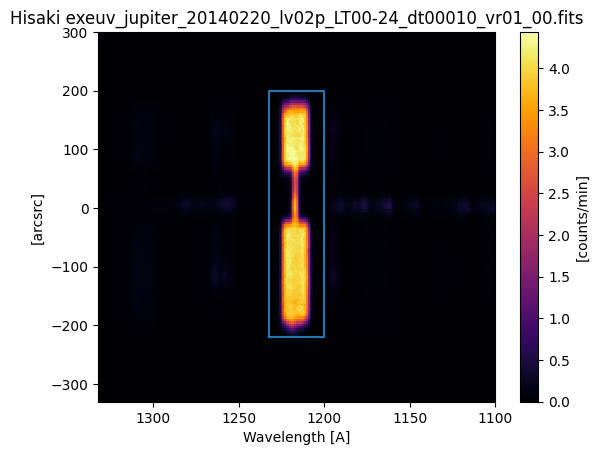

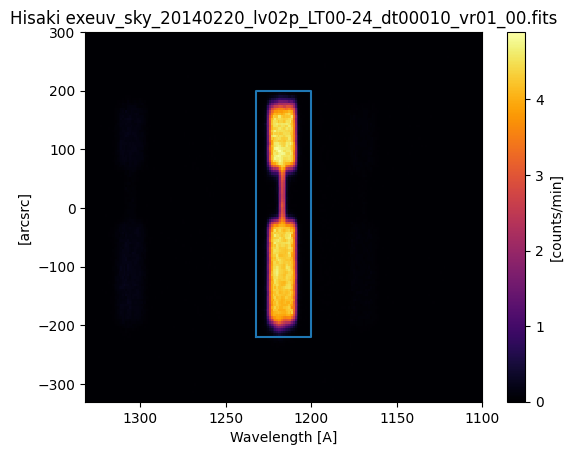

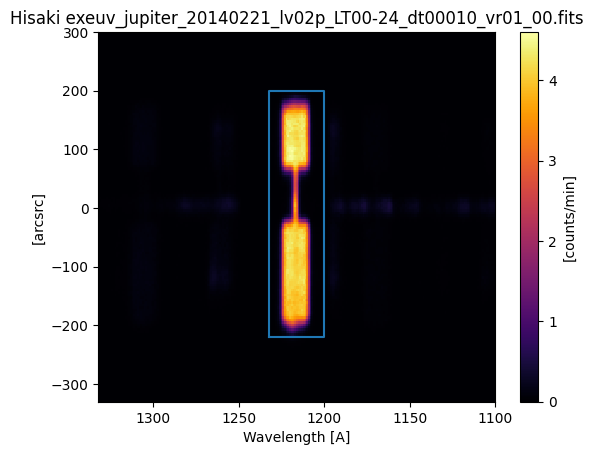

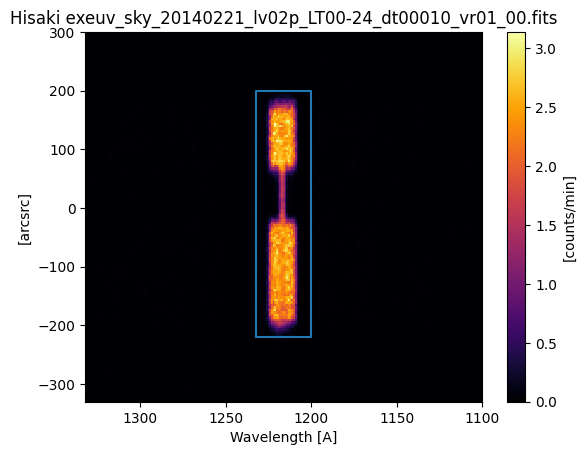

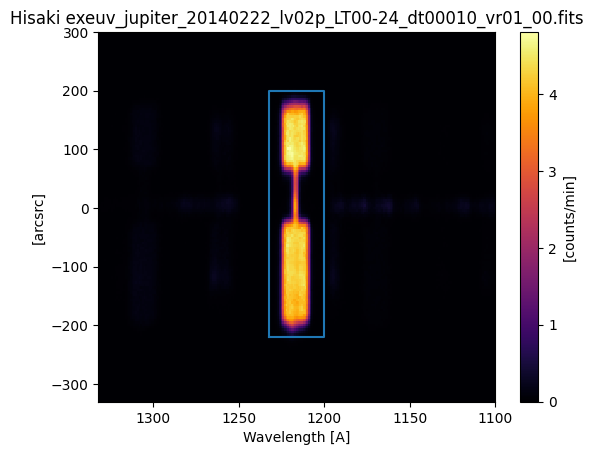

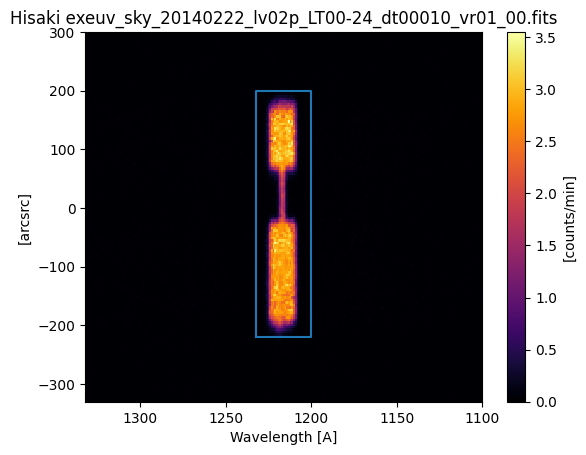

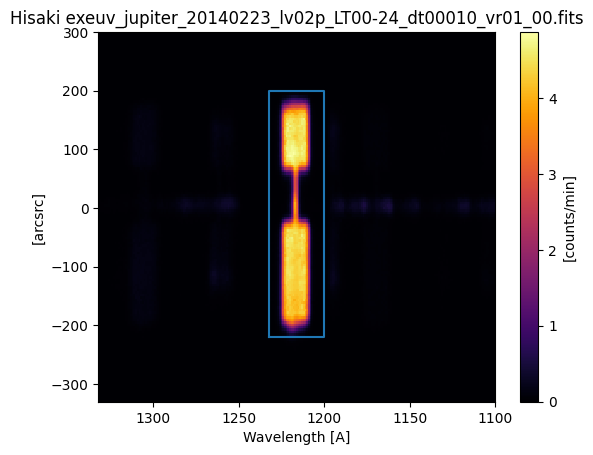

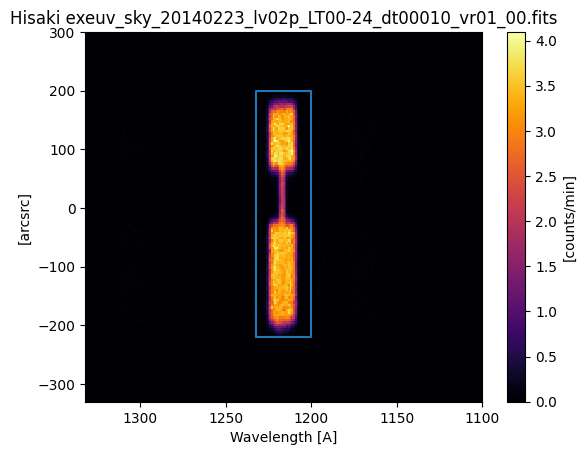

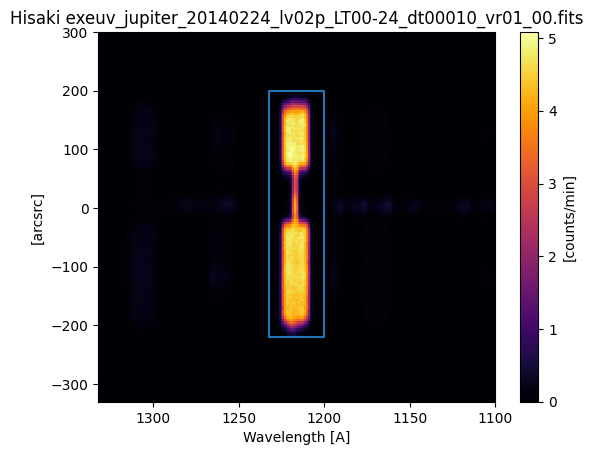

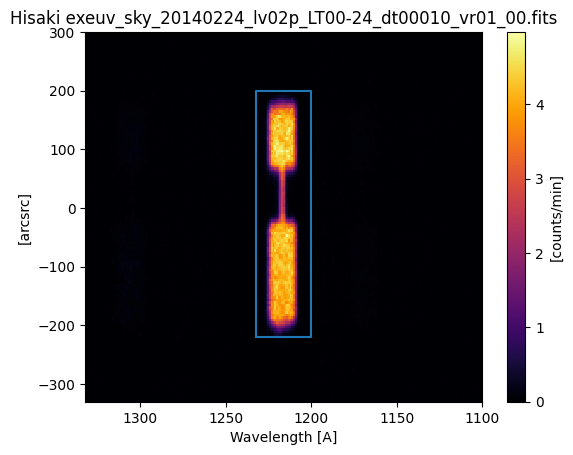

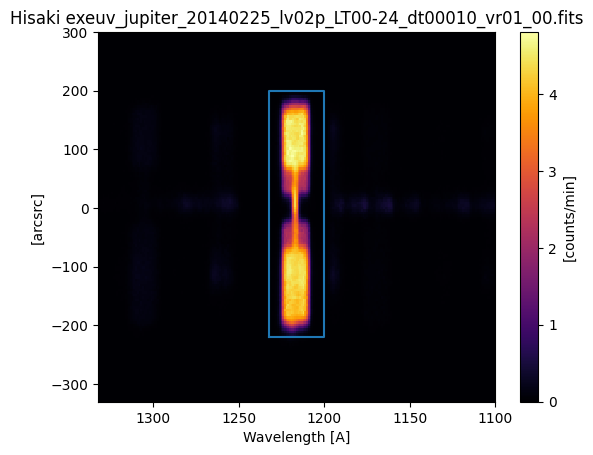

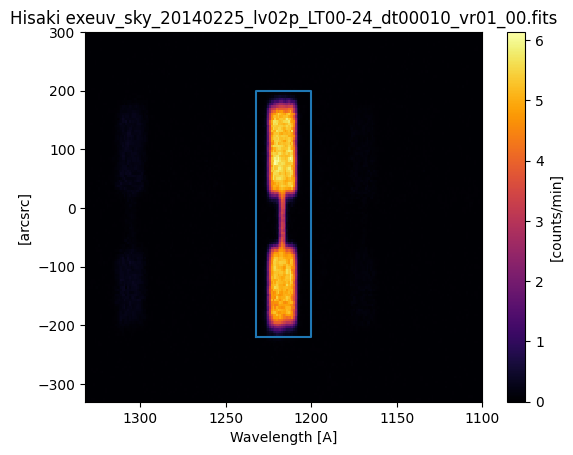

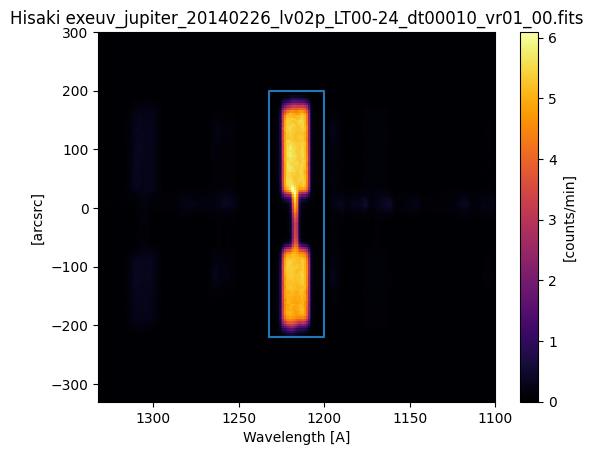

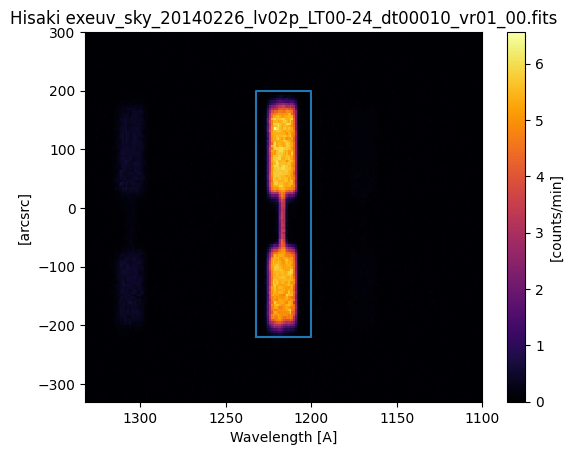

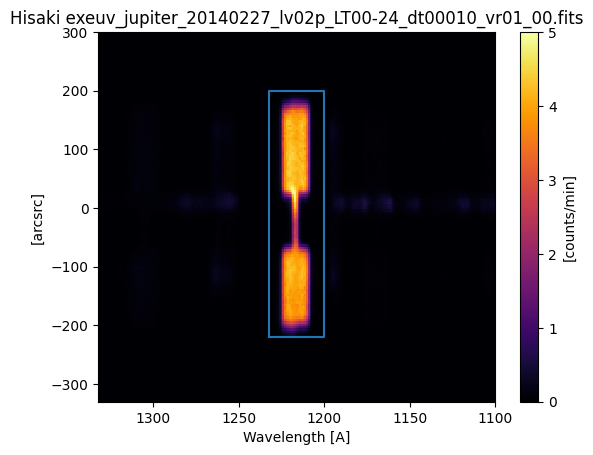

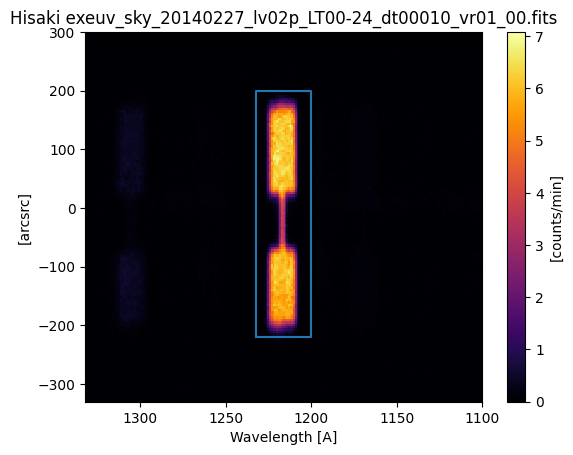

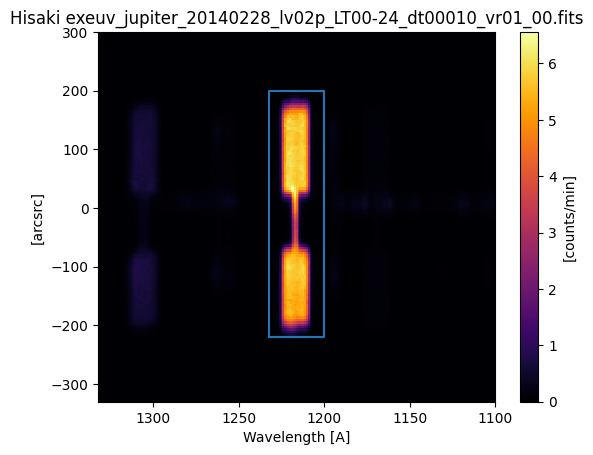

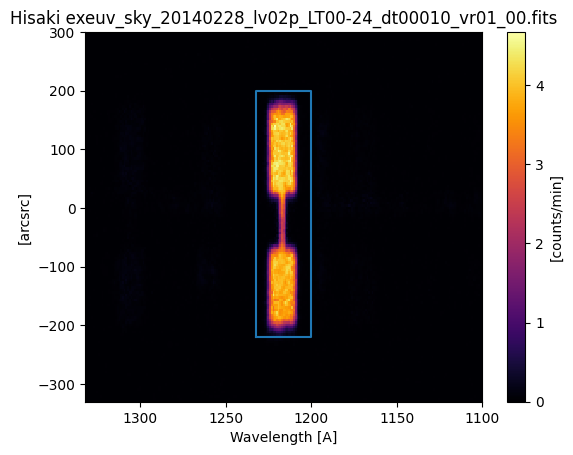

In [5]:
# Check ROI position on Hisaki's detector
import os

xx = [x_roi[0], x_roi[1], x_roi[1], x_roi[0], x_roi[0]]
yy = [y_roi[0], y_roi[0], y_roi[1], y_roi[1], y_roi[0]]

for fname in file_list:
    # open fits file
    hdul = hsk.fitsopen(fname)

    # get number of images
    n_ext = hsk.get_nextend(hdul)

    # get axis
    x_axis = hsk.get_xaxis(hdul, ext=1)
    y_axis = hsk.get_yaxis(hdul, ext=1)

    # get image integrated for one day (extension = 1)
    int_time_ = float(hsk.get_inttime(hdul, ext=1))
    img = hsk.get_img(hdul, ext=1) / int_time_     # counts/min

    fig = plt.figure()

    mesh = plt.pcolormesh(x_axis, y_axis, img, cmap='inferno')

    plt.plot(xx, yy)

    plt.colorbar(mesh, label='[counts/min]')
    plt.xlim(x_roi[0]+100.0, x_roi[1]-100.0)  # set xrange (in wavelength)
    plt.ylim(y_roi[0]*1.5, y_roi[1]*1.5)  # set yrange (in arcsec)
    plt.xlabel('Wavelength [A]')
    plt.ylabel('[arcsrc]')
    plt.title('Hisaki ' + os.path.basename(fname))


# (2-2) Store the data to PANDAS data frame

In [6]:
import pandas as pd

df = pd.DataFrame({
    'sclt': sclt,
    'int_time': int_time,
    'cnt_roi': cnt_roi,
    'err_roi': err_roi
}, index=timeDt)

# (3) Plot Hisaki data

Text(0, 0.5, 'HI Ly-a [counts/min]')

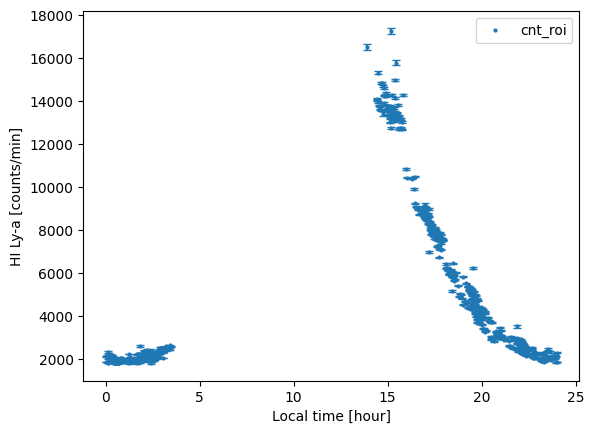

In [7]:
ax = df.plot(x='sclt', y='cnt_roi', style='g+', yerr='err_roi',fmt="o", ms=2.0, capsize=3.0)
ax.set_xlabel('Local time [hour]')
ax.set_ylabel('HI Ly-a [counts/min]')

Text(0, 0.5, 'HI Ly-a [counts/min]')

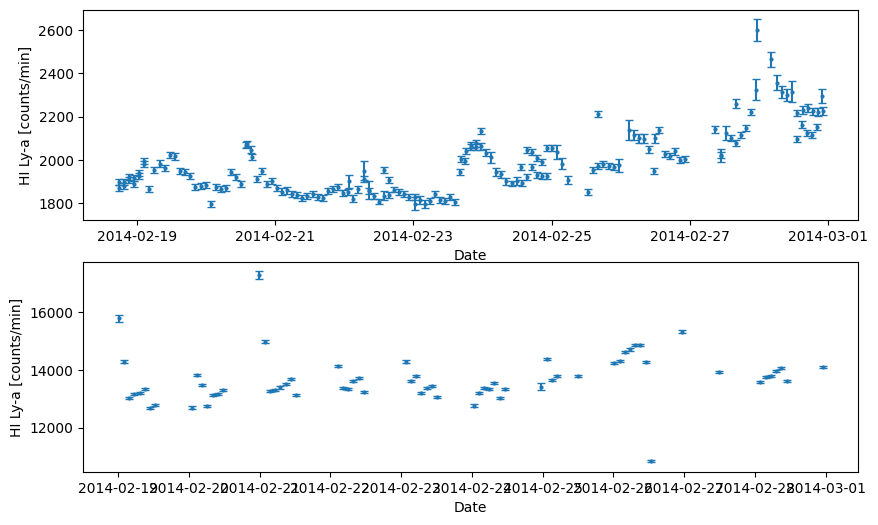

In [8]:
df_sel_14_17 = df[(df['sclt'] > 14) & (df['sclt'] < 16)]
df_sel_23_02 = df[(df['sclt'] > 23) | (df['sclt'] < 2)]

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.errorbar(df_sel_23_02.index,df_sel_23_02['cnt_roi'], yerr = df_sel_23_02['err_roi'], capsize=3, fmt='o', markersize=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('HI Ly-a [counts/min]')
ax2.errorbar(df_sel_14_17.index,df_sel_14_17['cnt_roi'], yerr = df_sel_14_17['err_roi'], capsize=3, fmt='o', markersize=2)
ax2.set_xlabel('Date')
ax2.set_ylabel('HI Ly-a [counts/min]')



# (4) Get Dst index (proxy of magnetic storm) and Solar Ly-a radiation

(4-1) Get Dst index data from world data center kyoto with pyspedas

(need to get pyspedas : $ pip install pyspedas pytplot)

22-Jun-25 23:16:55: **************************************************************************************
22-Jun-25 23:16:55: The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
22-Jun-25 23:16:55:  are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
22-Jun-25 23:16:55:  the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
22-Jun-25 23:16:55:  [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
22-Jun-25 23:16:55:  make the Dst index available.
22-Jun-25 23:16:55: **************************************************************************************


Text(0, 0.5, 'Dst index [nT]')

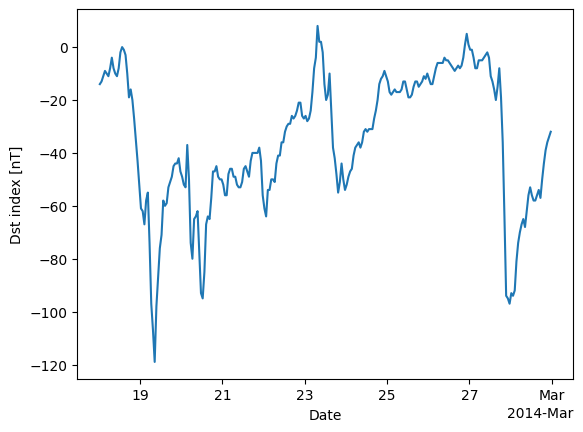

In [9]:
import pyspedas
from pytplot import get_data
from datetime import datetime

# Get Dst index data
ret = pyspedas.kyoto.dst(trange=['2014-02-18', '2014-03-01'])
unix_time, dst = get_data('kyoto_dst')
# convert unixtime to datetime variable
#dst_time = [datetime.fromtimestamp(t) for t in unix_time]  # note that this returns wrong time stamps !
dst_time = pyspedas.time_datetime(unix_time)

# Plot
plt.plot(dst_time, dst)
plt.xlabel('Date')
plt.ylabel('Dst index [nT]')

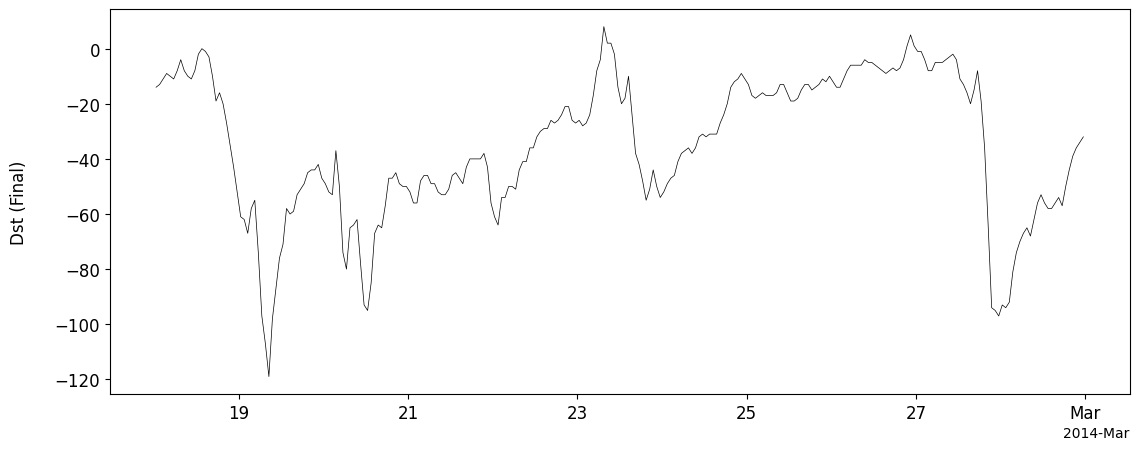

In [10]:
from pytplot import tplot
tplot('kyoto_dst')

(4-2) Get Solar Ly-a radiation at Earch from University of Colorado LASP

https://lasp.colorado.edu/eve/data_access/eve_data/fism/data/earth/fism_p_spectrum_earth_l2v01_r00_l3v01_r00_prelim.nc

In [11]:
import os
import urllib.request
import xarray as xr

# download the FISM data
save_name='../data/misc/fism_p_spectrum_earth_l2v01_r00_l3v01_r00_prelim.nc'
if os.path.exists(save_name):
    print(save_name + " exists.")
else:
    url='https://lasp.colorado.edu/eve/data_access/eve_data/fism/data/earth/fism_p_spectrum_earth_l2v01_r00_l3v01_r00_prelim.nc'
    urllib.request.urlretrieve(url, save_name)

ds = xr.open_dataset(save_name) 
print(ds.variables)

../data/misc/fism_p_spectrum_earth_l2v01_r00_l3v01_r00_prelim.nc exists.
Frozen({'irradiance': <xarray.Variable (time: 3552, wavelength: 195)> Size: 3MB
[692640 values with dtype=float32]
Attributes:
    units:      W/m^2/nm
    long_name:  FISM-P Irradiance, 'wavelength': <xarray.IndexVariable 'wavelength' (wavelength: 195)> Size: 780B
array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85

Text(0.5, 1.0, 'FISM UV Irradiance Spectrum')

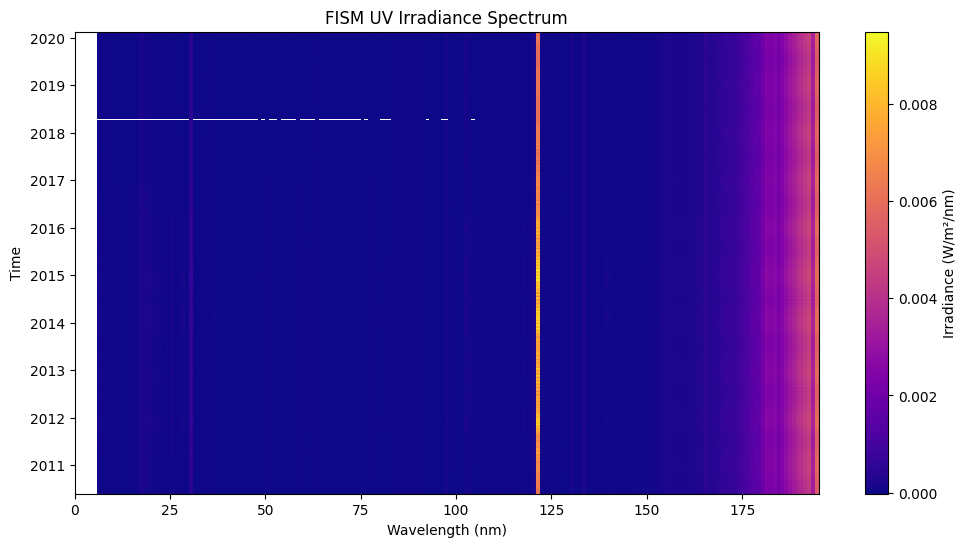

In [12]:
# Get variables
irradiance = ds['irradiance']          # (time, wavelength)
wavelength = ds['wavelength']          # (wavelength,)
time_irr = ds['time']                      # (time,)

# set x, y coordinate
# x-axis:wavelength (nm), y-axis: time
X, Y = np.meshgrid(wavelength, time_irr)

# Plot irradiance
plt.figure(figsize=(12, 6))
pcm = plt.pcolormesh(wavelength, time_irr, irradiance, shading='auto', cmap='plasma')
plt.colorbar(pcm, label='Irradiance (W/m²/nm)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time')
plt.title('FISM UV Irradiance Spectrum')

22-Jun-25 23:16:56: /opt/anaconda3/envs/pyspedas/lib/python3.11/site-packages/xarray/core/dataarray.py:6067: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)



Text(0.5, 1.0, 'Irradiance at 121.50 nm')

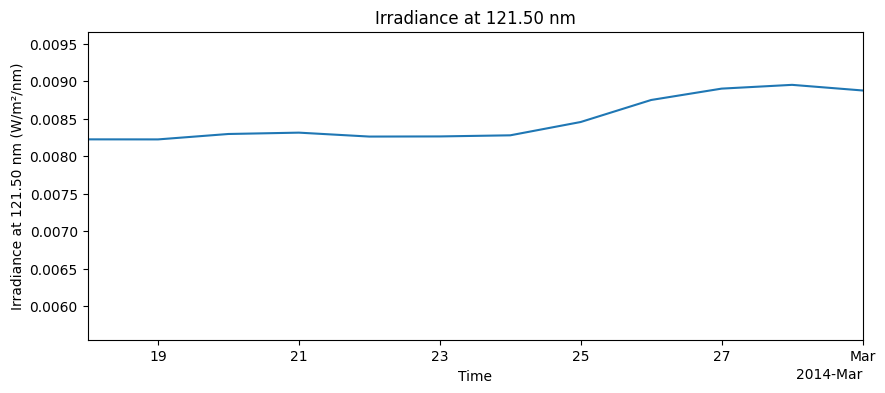

In [13]:
# Search index for wavelength=121.6nm (HI Ly-a)
nearest_idx = np.abs(wavelength - target_wavelength).argmin().item()
nearest_wavelength = wavelength[nearest_idx].item()

# get irradiance at target_wavelength
irr_1216 = irradiance[:, nearest_idx]

# time range
start_date = dt.date(2014, 2, 18)
stop_date = dt.date(2014, 3, 1)

# Plot irradiance at target_wavelength
plt.figure(figsize=(10, 4))
plt.plot(time_irr, irr_1216)
plt.xlabel("Time")
plt.xlim([start_date, stop_date])
plt.ylabel("Irradiance at {:.2f} nm (W/m²/nm)".format(nearest_wavelength))
plt.title("Irradiance at {:.2f} nm".format(nearest_wavelength))

# (5) Plot all

Text(0, 0.5, 'Irradiance at 121.50 nm (W/m²/nm)')

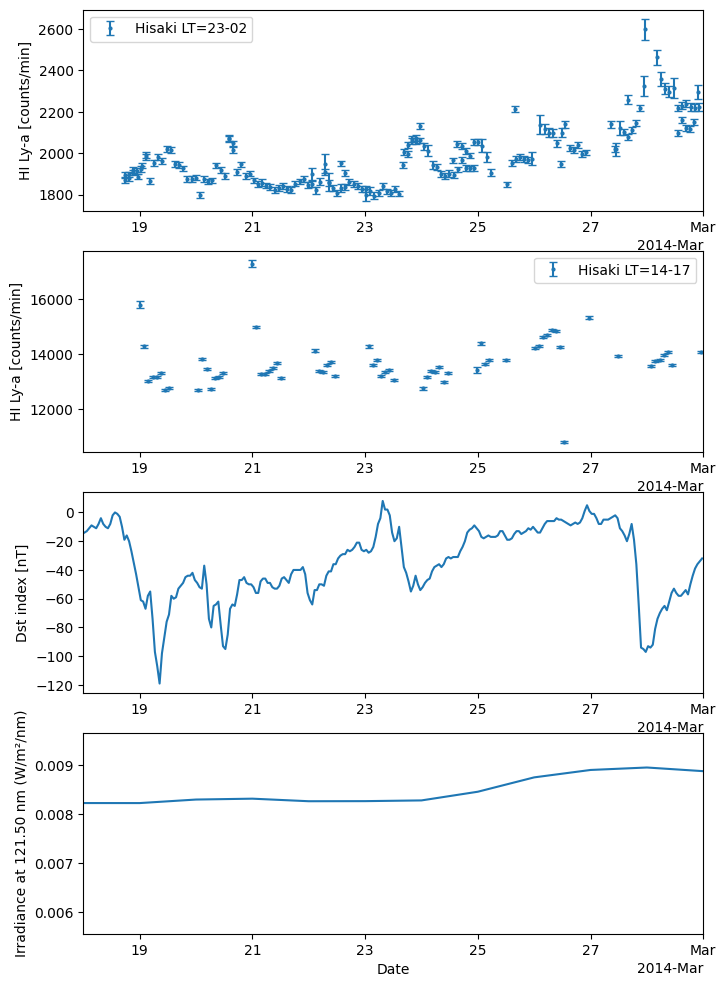

In [14]:
fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

size=2

# HI Ly-a LT 23-02 (Hisaki)
df_sel = df_sel_23_02
ax1.errorbar(df_sel.index,df_sel['cnt_roi'], yerr = df_sel['err_roi'], capsize=3, fmt='o', markersize=2, label='Hisaki LT=23-02')
ax1.set_ylabel('HI Ly-a [counts/min]')
ax1.set_xlim([start_date, stop_date])
ax1.legend()

# HI Ly-a LT 14-17 (Hisaki)
df_sel = df_sel_14_17
ax2.errorbar(df_sel.index,df_sel['cnt_roi'], yerr = df_sel['err_roi'], capsize=3, fmt='o', markersize=2, label='Hisaki LT=14-17')
ax2.set_ylabel('HI Ly-a [counts/min]')
ax2.set_xlim([start_date, stop_date])
ax2.legend()

# Dst index
ax3.plot(dst_time, dst)
ax3.set_ylabel('Dst index [nT]')
ax3.set_xlim([start_date, stop_date])

# DstのPLOT
ax4.plot(time_irr, irr_1216)
ax4.set_xlabel("Date")
ax4.set_xlim([start_date, stop_date])
ax4.set_ylabel("Irradiance at {:.2f} nm (W/m²/nm)".format(nearest_wavelength))
